In [1]:
from net import FullyConnectedNet
from solver import Solver
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Load the data
loaded_data = sio.loadmat('SVHN.mat')

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
# Preprocessing the data 
X_train, y_train, X_test, y_test = loaded_data['train_x'], loaded_data['train_label'].argmax(axis=1), loaded_data['test_x'], loaded_data['test_label'].argmax(axis=1)

# Split the data into train, val, and test sets
num_training = 44000
num_validation = 1000

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]


print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (44000, 784)
Train labels shape:  (44000,)
Validation data shape:  (1000, 784)
Validation labels shape:  (1000,)
Test data shape:  (15000, 784)
Test labels shape:  (15000,)


In [3]:
solvers = {}
data = {'X_val': X_val , 'X_train': X_train, 'y_val': y_val, 'y_train': y_train}

# solver_0 = FullyConnectedNet(hidden_dims=[100, 100, 50], weight_scale=5e-2)
# s = Solver(model=solver_0, data=data, num_epochs=500, batch_size=200, update_rule='sgd', optim_configs={'learning_rate': 1e-2})

In [6]:
# === Training ===
# sgd without regularization
solver_0 = FullyConnectedNet(hidden_dims=[100, 100, 50], weight_scale=5e-2)
solver = Solver(model=solver_0, data=data, num_epochs=500, batch_size=200, update_rule='sgd', optim_configs={'learning_rate': 1e-2})
solvers['sgd0'] = solver
solver.train()


(Epoch 1 / 500) train_acc: 0.093000  val_acc: 0.112000  loss: 2.304293
(Epoch 2 / 500) train_acc: 0.092000  val_acc: 0.098000  loss: 2.302440
(Epoch 3 / 500) train_acc: 0.094000  val_acc: 0.100000  loss: 2.302449
(Epoch 4 / 500) train_acc: 0.085000  val_acc: 0.096000  loss: 2.302545
(Epoch 5 / 500) train_acc: 0.100000  val_acc: 0.098000  loss: 2.301643
(Epoch 6 / 500) train_acc: 0.115000  val_acc: 0.101000  loss: 2.302095
(Epoch 7 / 500) train_acc: 0.116000  val_acc: 0.116000  loss: 2.300494
(Epoch 8 / 500) train_acc: 0.102000  val_acc: 0.121000  loss: 2.302230
(Epoch 9 / 500) train_acc: 0.109000  val_acc: 0.120000  loss: 2.301791
(Epoch 10 / 500) train_acc: 0.121000  val_acc: 0.136000  loss: 2.300575
(Epoch 11 / 500) train_acc: 0.118000  val_acc: 0.114000  loss: 2.301666
(Epoch 12 / 500) train_acc: 0.148000  val_acc: 0.130000  loss: 2.299609
(Epoch 13 / 500) train_acc: 0.152000  val_acc: 0.129000  loss: 2.300398
(Epoch 14 / 500) train_acc: 0.140000  val_acc: 0.126000  loss: 2.300334
(

In [ ]:
# # sgd with regularization
# model_sgd_1 = FullyConnectedNet(hidden_dims=[100, 100, 50], weight_scale=5e-2, reg=5)
# solver = Solver(model=model_sgd_1, data=data, num_epochs=500, batch_size=200, update_rule='sgd', optim_configs={'learning_rate': 1e-2})
# solvers['sgd1'] = solver
# solver.train()

In [7]:
# Adam without regularization
solver_1 = FullyConnectedNet(hidden_dims=[100, 100, 50], weight_scale=5e-2)
solver = Solver(model=solver_1, data=data, num_epochs=500, batch_size=200, update_rule='adam', optim_configs={'learning_rate': 1e-3})
solvers['adam0'] = solver
solver.train()

(Epoch 1 / 500) train_acc: 0.206000  val_acc: 0.232000  loss: 1.943085
(Epoch 2 / 500) train_acc: 0.384000  val_acc: 0.375000  loss: 1.604475
(Epoch 3 / 500) train_acc: 0.443000  val_acc: 0.457000  loss: 1.569699
(Epoch 4 / 500) train_acc: 0.496000  val_acc: 0.487000  loss: 1.505286
(Epoch 5 / 500) train_acc: 0.517000  val_acc: 0.554000  loss: 1.243255
(Epoch 6 / 500) train_acc: 0.529000  val_acc: 0.562000  loss: 1.383851
(Epoch 7 / 500) train_acc: 0.572000  val_acc: 0.608000  loss: 1.353671
(Epoch 8 / 500) train_acc: 0.580000  val_acc: 0.612000  loss: 1.155535
(Epoch 9 / 500) train_acc: 0.622000  val_acc: 0.624000  loss: 1.140731
(Epoch 10 / 500) train_acc: 0.629000  val_acc: 0.650000  loss: 1.075362
(Epoch 11 / 500) train_acc: 0.639000  val_acc: 0.648000  loss: 1.081640
(Epoch 12 / 500) train_acc: 0.672000  val_acc: 0.683000  loss: 1.123497
(Epoch 13 / 500) train_acc: 0.659000  val_acc: 0.667000  loss: 0.978409
(Epoch 14 / 500) train_acc: 0.708000  val_acc: 0.696000  loss: 0.905550
(

In [8]:
# # Adam with regularization
# solver_3 = FullyConnectedNet(hidden_dims=[100, 100, 50], weight_scale=5e-2, reg=10)
# solver = Solver(solver_3, data, num_epochs=500, batch_size=500, update_rule='adam', optim_configs={'learning_rate': 1e-3})
# solvers['adam1'] = solver
# solver.train()


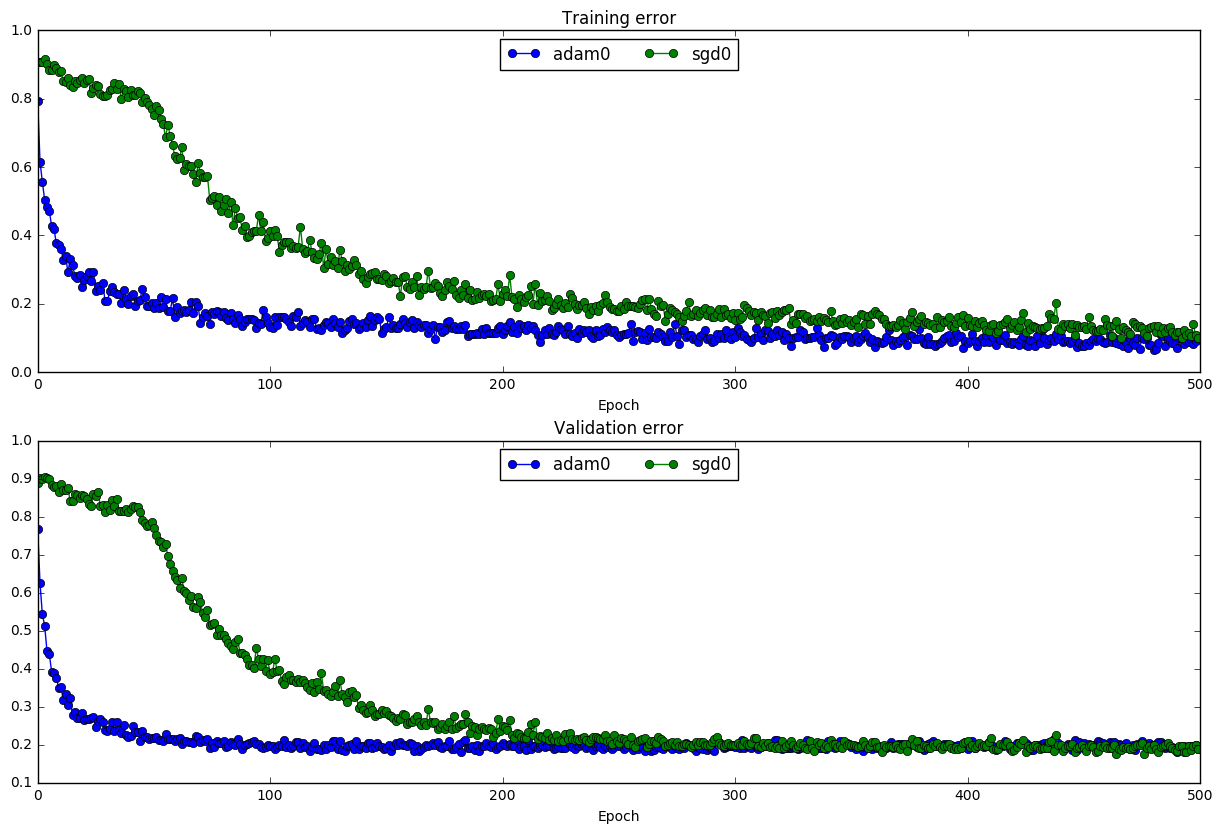

In [9]:
plt.subplot(3, 1, 2)
plt.title('Training error')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation error')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
    plt.subplot(3, 1, 2)
    plt.plot(solver.train_err_history, '-o', label=update_rule)

    plt.subplot(3, 1, 3)
    plt.plot(solver.val_err_history, '-o', label=update_rule)

for i in [2, 3]:
    plt.subplot(3, 1, i)
    plt.legend(loc='upper center', ncol=4)
    
plt.gcf().set_size_inches(15, 15)
plt.show()



In [10]:
# SGD without regularization
y_test_pred = np.argmax(solver_0.loss(X_test), axis=1)
y_val_pred = np.argmax(solver_0.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

Validation set accuracy:  0.825
Test set accuracy:  0.788733333333


In [11]:
# Adam without regularization
y_test_pred = np.argmax(solver_1.loss(X_test), axis=1)
y_val_pred = np.argmax(solver_1.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

Validation set accuracy:  0.821
Test set accuracy:  0.773933333333
